In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

[ WARN:0@1521.497] global loadsave.cpp:248 findDecoder imread_('img/rugas_noc.png'): can't open/read file: check file path/integrity


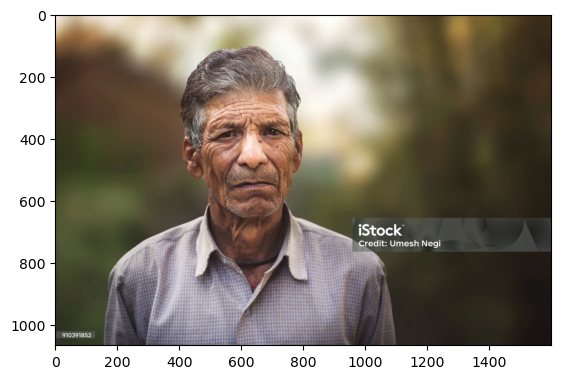

In [38]:
file = 'img/rugas_noc'
try:
    final = file+'.png'
    img = cv.imread(final)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
except cv.error:
    final = file+'.jpg'
    img = cv.imread(final)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


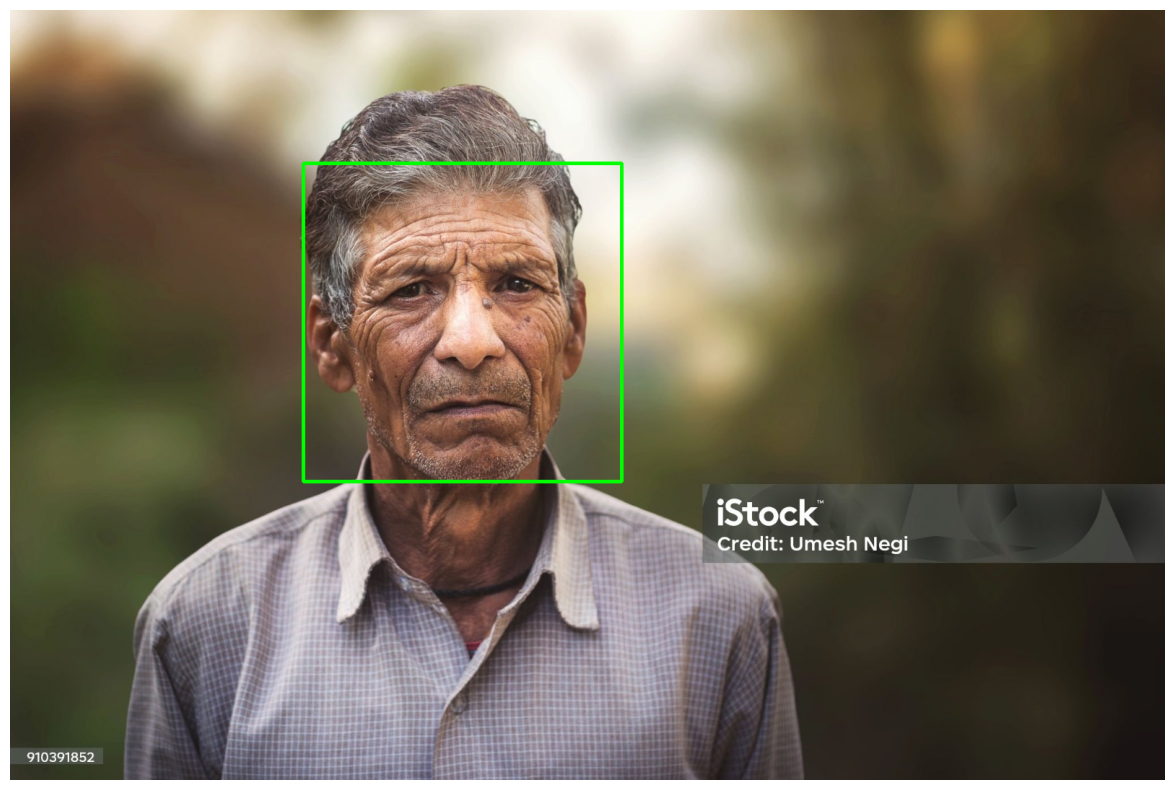

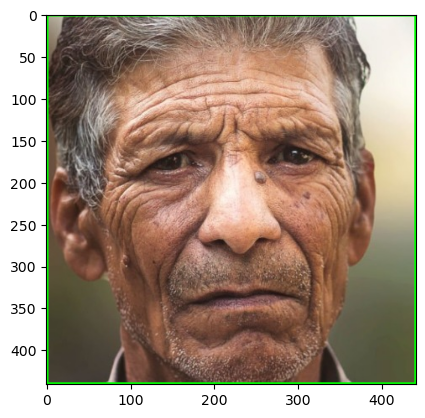

In [39]:
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

cropped_img = img[face[0][1] : face[0][1] + face[0][3], face[0][0] : face[0][0] + face[0][2]]


# x = face[0][0] = ponto x do canto superior esquerdo
# y = face[0][1] = ponto y do canto superior esquerdo
# w = face[0][2] = largura da face
# h = face[0][3] = altura da face

for (x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))


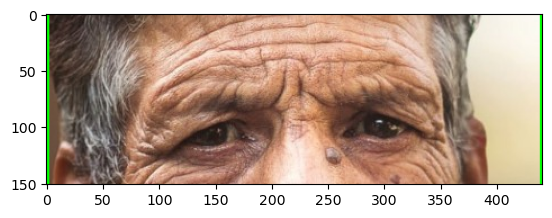

In [40]:
parte_cima = img[int(face[0][1]*1.33): face[0][1] + int(face[0][3]/2),face[0][0] : face[0][0] +face[0][2]]

plt.imshow(cv.cvtColor(parte_cima, cv.COLOR_BGR2RGB))


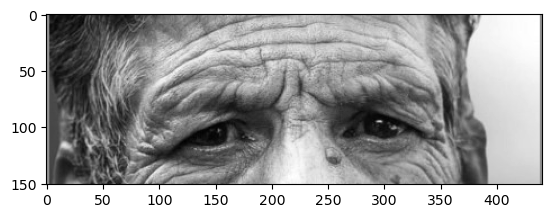

In [41]:

gray_crop = cv.cvtColor(parte_cima, cv.COLOR_BGR2GRAY)
plt.imshow(gray_crop, cmap='gray')
plt.show()


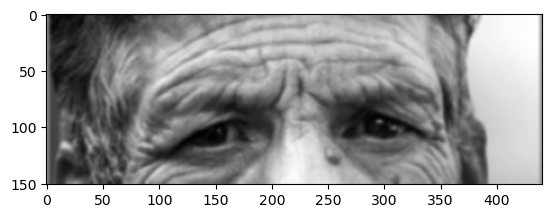

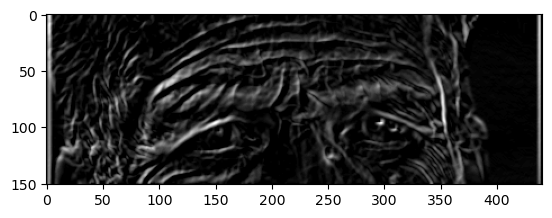

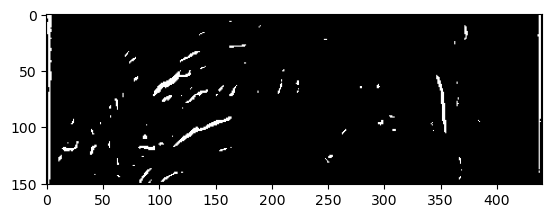

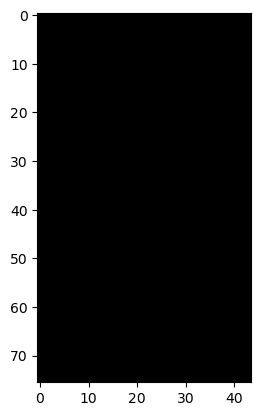

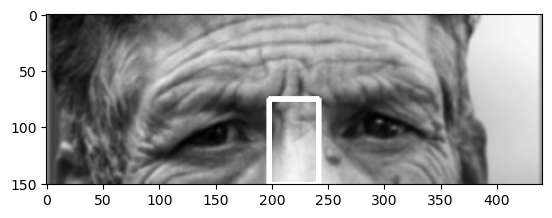

Não tem óculos


In [42]:
blur = cv.blur(gray_crop,(3,3))
blur = cv.blur(blur,(3,3))

plt.imshow(blur, cmap='gray')
plt.show()

#OPERADOR DE SOBEL
kernel = np.array([
    [2,0,-2],
    [4,0,-4],
    [2,0,-2]
])/9


# Aplica kernel a imagem usando Filtro Correlação
# src: imagem a ser manipulada
# ddepth: profundidade desejável da imagem de destino. O valor -1 representa que a imagem resultante terá a mesma profundidade da imagem de origem.
# kernel: matrix de kernel
vert = cv.filter2D(blur, -1, kernel)
horiz = cv.filter2D(blur, -1, kernel.T)
all_borders = vert + horiz

plt.show()
plt.imshow(all_borders, cmap='gray')
plt.show()
_,binary = cv.threshold(all_borders, 30, 255, cv.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.show()
#pesquisar o entre a metade da imagem na horizontal e metade de baixo da vertical

range_x_initial = int(len(binary.T)*0.45)
range_x_final = int(len(binary.T)*0.55)
range_y = int(len(binary)/2)
final = binary[range_y:,range_x_initial:range_x_final]
plt.imshow(final, cmap='gray')

cv.rectangle(blur, (range_x_initial, range_y), (range_x_final, len(binary)), (255, 0, 0), 4)
plt.show()

plt.imshow(blur, cmap='gray')
plt.show()
if 255 in final:
    print("Tem óculos")
else:
 print("Não tem óculos")
 
 
#